In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
def calculate_2dft(img):
    ft = np.fft.ifftshift(img)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(img):
    ift = np.fft.ifftshift(img)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

a.	Load the sample image Head_scan.jpg, calculate its 2D DFT and plot the Fourier spectrum and phase angles in a 1x2 grid form.

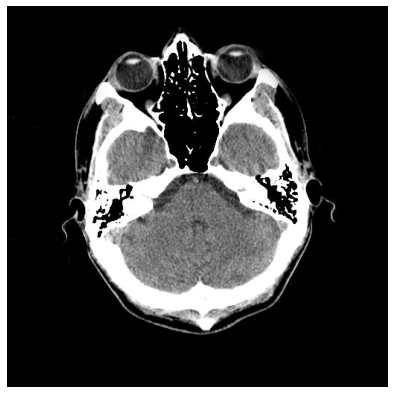

In [5]:
img = cv2.imread("Head_scan.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,7))
plt.set_cmap("gray")
plt.axis("off")
plt.imshow(img)
plt.show()

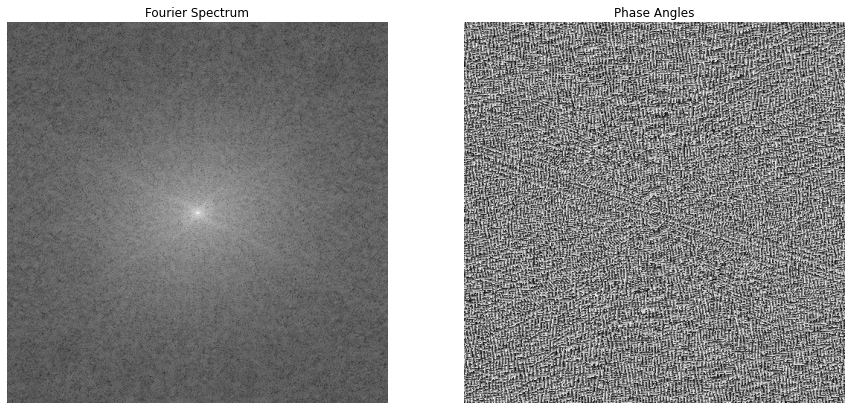

In [6]:
imgShift = calculate_2dft(img)
phase = np.angle(imgShift)

plt.figure(figsize=(15,7))
plt.set_cmap("gray")

plt.subplot(1,2,1)
plt.imshow(np.log(np.abs(imgShift)+1))
plt.title("Fourier Spectrum")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Phase Angles")
plt.axis("off")
plt.imshow(phase)

plt.show()

b.	Keep the phase of the Fourier transform and replace the magnitude of each frequency sample by its square root. Take the inverse DFT, plot and explain the results.

In [7]:
PSD = imgShift*np.conj(imgShift)
sqrt_imgShift = imgShift/np.sqrt(PSD)
sqrt_fred = calculate_2dift(sqrt_imgShift)

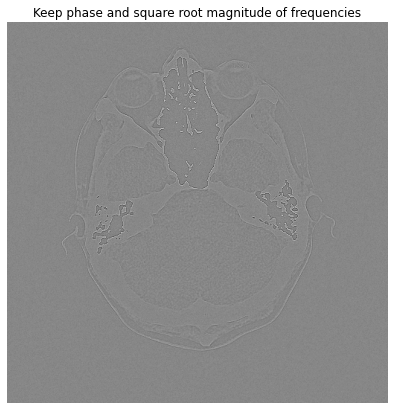

In [8]:
plt.figure(figsize = (10,7))
plt.title("Keep phase and square root magnitude of frequencies")
plt.axis("off")
plt.imshow(sqrt_fred)
plt.show()

c.	Keep magnitude and set the phase of the low frequencies to zero. Take the inverse DFT, and explain the results.

In [9]:
nx,ny = img.shape
X,Y = np.meshgrid(np.arange(-ny/2+1,ny/2+1),np.arange(-nx/2+1,nx/2+1))
R = np.power(X,2) + np.power(Y,2)
ind_low = R < 100**2 # vùng low
ind_high = R >= 100**2 # vùng high

imgShiftFilt_lowf = np.complex128(PSD) * ind_low
imgShiftFilt_highf = imgShift * ind_high
zero_img = np.zeros((nx,ny),dtype=np.complex128)
zero_img = zero_img + imgShiftFilt_highf + imgShiftFilt_lowf


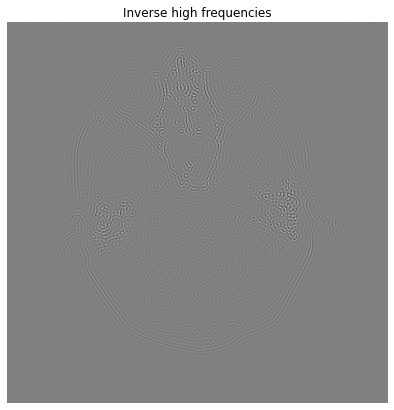

In [16]:
plt.figure(figsize=(10,7))
plt.axis("off")
plt.title("Inverse high frequencies")
plt.imshow(calculate_2dift(imgShiftFilt_highf))
plt.show()

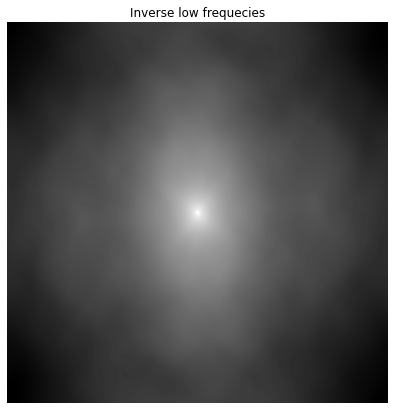

In [17]:
plt.figure(figsize=(10,7))
plt.axis("off")
plt.title("Inverse low frequecies")
plt.imshow(calculate_2dift(imgShiftFilt_lowf))
plt.show()

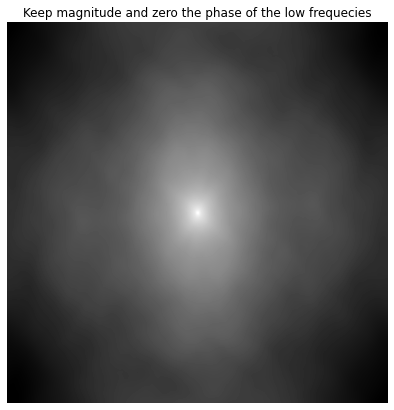

In [11]:
plt.figure(figsize=(10,7))
plt.title("Keep magnitude and zero the phase of the low frequecies")
plt.axis("off")
plt.imshow(calculate_2dift(zero_img))
plt.show()

d.	Set both the magnitude and phase of the high frequencies to zero and take the inverse DFT, and explain what you see.

In [12]:
imgShiftFilt = imgShift * ind_low
Ffilt = np.log(np.abs(imgShiftFilt)+1)

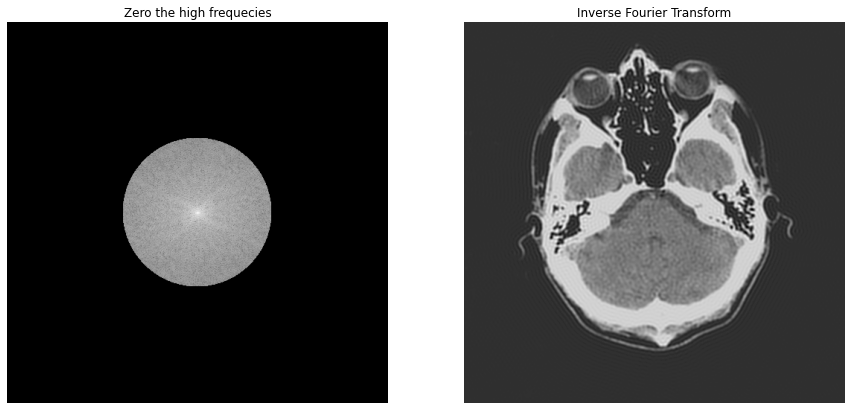

In [13]:
plt.figure(figsize=(15,7))
plt.axis("off")

plt.subplot(1,2,1)
plt.imshow(Ffilt)
plt.axis("off")
plt.title("Zero the high frequecies")

plt.subplot(1,2,2)
plt.imshow(calculate_2dift(imgShiftFilt))
plt.axis("off")
plt.title("Inverse Fourier Transform")

plt.show()